Analisis exploratorio

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.stats.diagnostic as diag
import statsmodels.api as sm
import seaborn as sns
from sklearn.model_selection import train_test_split

In [7]:
datos = pd.read_csv("train.csv", encoding="latin1")
datos.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


Tamaño del conjunto de entrenamiento: 1021
Tamaño del conjunto de prueba: 438


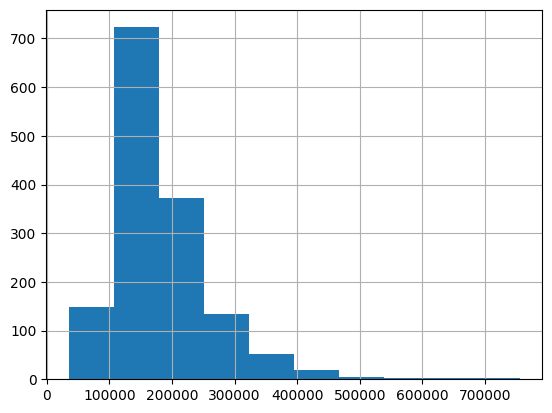

In [8]:

#datos.head()
#columnas = list(datos.columns)
#tipos = list(datos.dtypes)

numericas = datos.select_dtypes(include='number')
categoricas = datos.select_dtypes(include='object')


numericas = numericas.drop(["Fireplaces", "GarageYrBlt", "Id", "MSSubClass", "WoodDeckSF", "OpenPorchSF", "EnclosedPorch", "3SsnPorch", "ScreenPorch", "MoSold", "YrSold"], axis=1)
numericas["SalePrice"].hist()
X = numericas.drop("SalePrice", axis=1)
Y = numericas
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3,train_size=0.7)
print(f"Tamaño del conjunto de entrenamiento: {len(X_train)}")
print(f"Tamaño del conjunto de prueba: {len(X_test)}")


<AxesSubplot:>

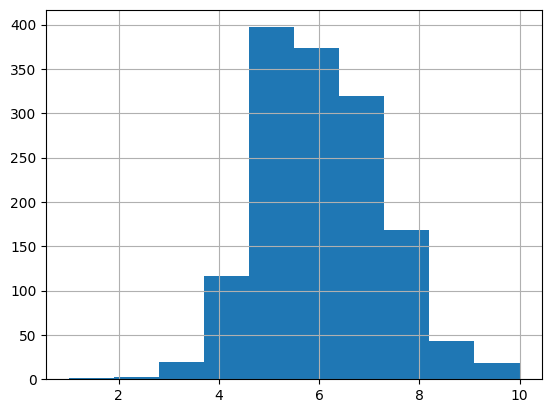

In [39]:
numericas['OverallQual'].hist()

¿Cual es el promedio de precio dependiendo de la clasificación de area?

In [54]:
zone = datos.groupby(['MSZoning'],as_index=False).agg({"SalePrice":"mean"}).sort_values(by="SalePrice")

zone

,MSZoning,SalePrice
0,C (all),74528.000000
4,RM,126316.830275
2,RH,131558.375000
3,RL,191004.994787
1,FV,214014.061538


¿Cual es el promedio de precio dependiendo del tipo de entrada?

In [56]:
access = datos.groupby(['Street'],as_index=False).agg({"SalePrice":"mean"}).sort_values(by="SalePrice")
access

,Street,SalePrice
0,Grvl,130190.500000
1,Pave,181130.538514


¿Cual es el promedio del precio dependiendo de la vecindad?

In [66]:
neighborhood = datos.groupby(['Neighborhood'],as_index=False).agg({"SalePrice":"mean"}).sort_values(by="SalePrice")
neighborhood

neighborhood

,Neighborhood,SalePrice
10,MeadowV,98576.470588
9,IDOTRR,100123.783784
2,BrDale,104493.750000
3,BrkSide,124834.051724
7,Edwards,128219.700000
17,OldTown,128225.300885
19,Sawyer,136793.135135
1,Blueste,137500.000000
18,SWISU,142591.360000
13,NPkVill,142694.444444


In [57]:


# Visualize the correlation between numerical variables
plt.figure(figsize=(12, 12))
sns.heatmap(numericas.select_dtypes(include='number').corr(), cmap='coolwarm', annot=True)
plt.title('Correlation Matrix')
plt.show()


Index(['OverallQual', 'GrLivArea', 'GarageCars', 'GarageArea', 'TotalBsmtSF'], dtype='object')

In [ ]:

# Visualize the relationship between SalePrice and the top correlated numerical variables
top_corr = train_df.select_dtypes(include='number').corr()['SalePrice'].abs().sort_values(ascending=False)[1:6].index
sns.pairplot(train_df, x_vars=top_corr, y_vars=['SalePrice'], height=4, aspect=1, kind='reg')
plt.show()

# Visualize the relationship between SalePrice and categorical variables
plt.figure(figsize=(12, 8))
sns.boxplot(x='OverallQual', y='SalePrice', data=train_df)
plt.title('Relationship between Overall Quality and SalePrice')
plt.show()

